In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 


In [4]:
df = pd.read_csv("ushape.csv")


In [5]:
df.head()

,X,Y,class
0,0.0316,0.9870,0.0
1,2.1200,-0.0462,1.0
2,0.8820,-0.0758,0.0
3,-0.0551,-0.0373,1.0
4,0.8300,-0.5390,1.0


In [7]:
df.shape

(100, 3)

In [9]:
df.duplicated().sum()

0

In [18]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [10]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [13]:
model = Sequential()

In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             3 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

In [34]:
model.add(Dense(3,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

In [35]:
model.get_weights()

[array([[1.],
        [1.]], dtype=float32),
 array([1.], dtype=float32),
 array([[1., 1., 1.]], dtype=float32),
 array([1., 1., 1.], dtype=float32),
 array([[ 0.03895831,  0.5280628 , -0.40090084],
        [ 0.5270815 ,  0.34838462,  0.589272  ],
        [ 0.40139318, -0.386755  , -0.1431768 ]], dtype=float32),
 array([0., 0., 0.], dtype=float32),
 array([[ 0.8739046 ],
        [ 0.41523576],
        [-0.32876122]], dtype=float32),
 array([0.], dtype=float32)]

In [36]:
initialize_weights = model.get_weights()

In [37]:
initialize_weights[0] = np.ones(model.get_weights()[0].shape)
initialize_weights[1] = np.ones(model.get_weights()[1].shape)
initialize_weights[2] = np.ones(model.get_weights()[2].shape)
initialize_weights[3] = np.ones(model.get_weights()[3].shape)

In [38]:
model.set_weights(initialize_weights)

In [39]:
model.get_weights()

[array([[1.],
        [1.]], dtype=float32),
 array([1.], dtype=float32),
 array([[1., 1., 1.]], dtype=float32),
 array([1., 1., 1.], dtype=float32),
 array([[ 0.03895831,  0.5280628 , -0.40090084],
        [ 0.5270815 ,  0.34838462,  0.589272  ],
        [ 0.40139318, -0.386755  , -0.1431768 ]], dtype=float32),
 array([0., 0., 0.], dtype=float32),
 array([[ 0.8739046 ],
        [ 0.41523576],
        [-0.32876122]], dtype=float32),
 array([0.], dtype=float32)]

In [40]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [41]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 179ms/step - accuracy: 0.5000 - loss: 0.8005 - val_accuracy: 0.5000 - val_loss: 0.7774
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.5000 - loss: 0.7949 - val_accuracy: 0.5000 - val_loss: 0.7725
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5000 - loss: 0.7898 - val_accuracy: 0.5000 - val_loss: 0.7680
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5000 - loss: 0.7848 - val_accuracy: 0.5000 - val_loss: 0.7635
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5000 - loss: 0.7796 - val_accuracy: 0.5000 - val_loss: 0.7591
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.5000 - loss: 0.7745 - val_accuracy: 0.5000 - val_loss: 0.7549
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5000 - loss: 0.7705 - val_accuracy: 0.5000 - val_loss: 0.7508
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.5000 - loss: 0.7663 - val_accuracy: 0.5000 - val_loss

In [42]:
model.get_weights()

[array([[1.1841079],
        [0.7838689]], dtype=float32),
 array([0.9436736], dtype=float32),
 array([[0.9290647 , 0.93368673, 0.9314118 ]], dtype=float32),
 array([0.85948837, 0.8989894 , 0.88102406], dtype=float32),
 array([[-0.06691663,  0.42475593, -0.28245935],
        [ 0.4210733 ,  0.24494818,  0.70787287],
        [ 0.2954469 , -0.4901315 , -0.02464925]], dtype=float32),
 array([-0.11360505, -0.11079298,  0.12786572], dtype=float32),
 array([[ 0.77937   ],
        [ 0.3402671 ],
        [-0.48974967]], dtype=float32),
 array([-0.11681225], dtype=float32)]

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step


<Axes: >

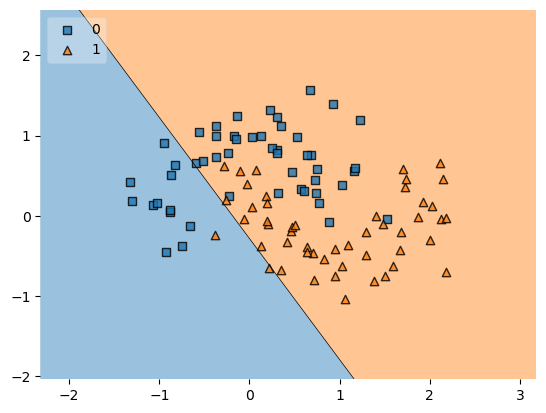

In [44]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'),clf=model,legend=2)